# Library

In [1]:
import sys
sys.path.append('../../Util')
import PreProcessingUtils as ppu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [9]:
PATH = "../../Datasets/"

In [10]:
df = pd.read_csv(f"{PATH}RawData/members.csv")
df

,id,username,site_id,profile_url,homepage_url,avatar_url,registration_date,age,signature,location,...,last_visit,total_posts,first_post_on,last_post_on,reputation,prestige,other_info,db_created_on,db_updated_on,joined_date
0,19215,Ghost-,1019,http://dreadditevelidot.onion/u/Ghost-,NONE,http://dreadditevelidot.onion/u/Ghost-,2019-03-09 00:00:00,0.0,NaN,none,...,1900-01-01 00:00:00,1.0,NaN,NaN,0.0,0.0,NaN,2020-12-20 01:27:50.435376,2020-12-20 01:27:50.435376,NaN
1,30723,trentcarson,1019,http://dreadditevelidot.onion/u/trentcarson,NONE,http://kzu6yzouezayt2pb.onion/u/trentcarson,2018-07-01 00:00:00,0.0,NaN,none,...,1900-01-01 00:00:00,2.0,NaN,NaN,1.0,0.0,NaN,2020-12-20 01:26:36.551817,2020-12-20 01:26:36.551817,NaN
2,27796,svtlhana,1019,http://dreadditevelidot.onion/u/svtlhana,NONE,http://kzu6yzouezayt2pb.onion/u/svtlhana,2018-12-26 00:00:00,0.0,NaN,none,...,1900-01-01 00:00:00,6.0,NaN,NaN,0.0,0.0,NaN,2020-12-20 01:25:05.710668,2020-12-20 01:25:05.710668,NaN
3,23894,GingerPotato1,1019,http://dreadditevelidot.onion/u/GingerPotato1,NONE,NONE,1900-01-01 00:00:00,0.0,NONE,NONE,...,1900-01-01 00:00:00,0.0,NaN,NaN,0.0,0.0,NaN,2020-12-20 01:26:18.080639,2020-12-20 01:26:18.080639,NaN
4,30717,Skierrant,1019,http://dreadditevelidot.onion/u/Skierrant,NONE,http://kzu6yzouezayt2pb.onion/u/Skierrant,2018-08-17 00:00:00,0.0,NaN,none,...,1900-01-01 00:00:00,1.0,NaN,NaN,0.0,0.0,NaN,2020-12-20 01:26:36.533953,2020-12-20 01:26:36.533953,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52401,39477,DCUK,1019,http://dreadditevelidot.onion/u/DCUK,NONE,http://dreadditevelidot.onion/u/DCUK,2018-07-24 00:00:00,0.0,NaN,none,...,1900-01-01 00:00:00,94.0,NaN,NaN,32.0,0.0,NaN,2020-12-20 02:29:55.418468,2020-12-20 02:29:55.418468,NaN
52402,39478,ukgreendoctor,1019,http://dreadditevelidot.onion/u/ukgreendoctor,NONE,http://dreadditevelidot.onion/u/ukgreendoctor,2019-09-01 00:00:00,0.0,NaN,none,...,1900-01-01 00:00:00,4.0,NaN,NaN,1.0,0.0,NaN,2020-12-20 02:29:55.423111,2020-12-20 02:29:55.423111,NaN
52403,39479,shreateh,1019,http://dreadditevelidot.onion/u/shreateh,NONE,http://dreadditevelidot.onion/u/shreateh,2019-07-31 00:00:00,0.0,NaN,none,...,1900-01-01 00:00:00,14.0,NaN,NaN,-1.0,0.0,NaN,2020-12-20 02:29:55.427473,2020-12-20 02:29:55.427473,NaN
52404,39480,daone,1019,http://dreadditevelidot.onion/u/daone,NONE,http://dreadditevelidot.onion/u/daone,2019-07-19 00:00:00,0.0,NaN,none,...,1900-01-01 00:00:00,38.0,NaN,NaN,6.0,0.0,NaN,2020-12-20 02:29:55.431715,2020-12-20 02:29:55.431715,NaN


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52406 entries, 0 to 52405
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52406 non-null  int64  
 1   username           52405 non-null  object 
 2   site_id            52406 non-null  int64  
 3   profile_url        47532 non-null  object 
 4   homepage_url       47532 non-null  object 
 5   avatar_url         47532 non-null  object 
 6   registration_date  47532 non-null  object 
 7   age                47532 non-null  float64
 8   signature          10005 non-null  object 
 9   location           47532 non-null  object 
 10  location_time      47532 non-null  object 
 11  time_spent         47532 non-null  float64
 12  last_visit         47532 non-null  object 
 13  total_posts        47532 non-null  float64
 14  first_post_on      565 non-null    object 
 15  last_post_on       565 non-null    object 
 16  reputation         475

In [204]:
df.describe()

,id,site_id,age,time_spent,total_posts,reputation,prestige,other_info,joined_date
count,52406.000000,52406.0,47532.0,47532.0,47532.000000,47532.000000,47532.0,0.0,0.0
mean,23633.718277,1019.0,0.0,0.0,53.607927,17.810549,0.0,NaN,NaN
std,13822.930354,0.0,0.0,0.0,445.544887,190.750531,0.0,NaN,NaN
min,-1.000000,1019.0,0.0,0.0,0.000000,-1313.000000,0.0,NaN,NaN
25%,11599.000000,1019.0,0.0,0.0,1.000000,0.000000,0.0,NaN,NaN
50%,23634.500000,1019.0,0.0,0.0,3.000000,0.000000,0.0,NaN,NaN
75%,35603.750000,1019.0,0.0,0.0,10.000000,2.000000,0.0,NaN,NaN
max,47532.000000,1019.0,0.0,0.0,10775.000000,4910.000000,0.0,NaN,NaN


In [205]:
df.describe(include='object')

,username,profile_url,homepage_url,avatar_url,registration_date,signature,location,location_time,last_visit,first_post_on,last_post_on,db_created_on,db_updated_on
count,52405,47532,47532,47532,47532,10005,47532,47532,47532,565,565,52406,52406
unique,43116,41065,1,34085,625,1,2,1,1,565,565,52406,52406
top,NONE,http://dreadditevelidot.onion/u/Witchman05,NONE,NONE,1900-01-01 00:00:00,NONE,none,1900-01-01 00:00:00,1900-01-01 00:00:00,2019-04-20 01:51:00,2019-04-20 01:51:00,2020-12-20 01:27:50.435376,2020-12-20 01:27:50.435376
freq,2224,60,47532,10005,10005,10005,37527,47532,47532,1,1,1,1


In [206]:
df.nunique()

id                   47533
username             43116
site_id                  1
profile_url          41065
homepage_url             1
avatar_url           34085
registration_date      625
age                      1
signature                1
location                 2
location_time            1
time_spent               1
last_visit               1
total_posts            687
first_post_on          565
last_post_on           565
reputation             496
prestige                 1
other_info               0
db_created_on        52406
db_updated_on        52406
joined_date              0
dtype: int64

In [207]:
df.isnull().sum()

id                       0
username                 1
site_id                  0
profile_url           4874
homepage_url          4874
avatar_url            4874
registration_date     4874
age                   4874
signature            42401
location              4874
location_time         4874
time_spent            4874
last_visit            4874
total_posts           4874
first_post_on        51841
last_post_on         51841
reputation            4874
prestige              4874
other_info           52406
db_created_on            0
db_updated_on            0
joined_date          52406
dtype: int64

In [208]:
df.duplicated().sum()

0

In [209]:
df[(df['db_created_on'] == df['db_updated_on'])][['db_created_on', 'db_updated_on']]

,db_created_on,db_updated_on
0,2020-12-20 01:27:50.435376,2020-12-20 01:27:50.435376
1,2020-12-20 01:26:36.551817,2020-12-20 01:26:36.551817
2,2020-12-20 01:25:05.710668,2020-12-20 01:25:05.710668
3,2020-12-20 01:26:18.080639,2020-12-20 01:26:18.080639
4,2020-12-20 01:26:36.533953,2020-12-20 01:26:36.533953
...,...,...
52401,2020-12-20 02:29:55.418468,2020-12-20 02:29:55.418468
52402,2020-12-20 02:29:55.423111,2020-12-20 02:29:55.423111
52403,2020-12-20 02:29:55.427473,2020-12-20 02:29:55.427473
52404,2020-12-20 02:29:55.431715,2020-12-20 02:29:55.431715


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52406 entries, 0 to 52405
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52406 non-null  int64  
 1   username           52405 non-null  object 
 2   site_id            52406 non-null  int64  
 3   profile_url        47532 non-null  object 
 4   homepage_url       47532 non-null  object 
 5   avatar_url         47532 non-null  object 
 6   registration_date  47532 non-null  object 
 7   age                47532 non-null  float64
 8   signature          10005 non-null  object 
 9   location           47532 non-null  object 
 10  location_time      47532 non-null  object 
 11  time_spent         47532 non-null  float64
 12  last_visit         47532 non-null  object 
 13  total_posts        47532 non-null  float64
 14  first_post_on      565 non-null    object 
 15  last_post_on       565 non-null    object 
 16  reputation         475

In [211]:
df.drop(columns=['db_created_on', 'db_updated_on', 'site_id', 'joined_date', 'other_info', 'last_post_on', 'first_post_on'], inplace=True)

## Data Wrangling

In [212]:
df.head()

,id,username,profile_url,homepage_url,avatar_url,registration_date,age,signature,location,location_time,time_spent,last_visit,total_posts,reputation,prestige
0,19215,Ghost-,http://dreadditevelidot.onion/u/Ghost-,NONE,http://dreadditevelidot.onion/u/Ghost-,2019-03-09 00:00:00,0.0,NaN,none,1900-01-01 00:00:00,0.0,1900-01-01 00:00:00,1.0,0.0,0.0
1,30723,trentcarson,http://dreadditevelidot.onion/u/trentcarson,NONE,http://kzu6yzouezayt2pb.onion/u/trentcarson,2018-07-01 00:00:00,0.0,NaN,none,1900-01-01 00:00:00,0.0,1900-01-01 00:00:00,2.0,1.0,0.0
2,27796,svtlhana,http://dreadditevelidot.onion/u/svtlhana,NONE,http://kzu6yzouezayt2pb.onion/u/svtlhana,2018-12-26 00:00:00,0.0,NaN,none,1900-01-01 00:00:00,0.0,1900-01-01 00:00:00,6.0,0.0,0.0
3,23894,GingerPotato1,http://dreadditevelidot.onion/u/GingerPotato1,NONE,NONE,1900-01-01 00:00:00,0.0,NONE,NONE,1900-01-01 00:00:00,0.0,1900-01-01 00:00:00,0.0,0.0,0.0
4,30717,Skierrant,http://dreadditevelidot.onion/u/Skierrant,NONE,http://kzu6yzouezayt2pb.onion/u/Skierrant,2018-08-17 00:00:00,0.0,NaN,none,1900-01-01 00:00:00,0.0,1900-01-01 00:00:00,1.0,0.0,0.0


In [213]:
df['age'].value_counts()

age
0.0    47532
Name: count, dtype: int64

In [214]:
df['reputation'].value_counts()

reputation
 0.0      25887
 1.0       5184
 2.0       2602
-1.0       1902
 3.0       1467
          ...  
 294.0        1
-66.0         1
 147.0        1
 852.0        1
-110.0        1
Name: count, Length: 496, dtype: int64

In [215]:
df['prestige'].value_counts()

prestige
0.0    47532
Name: count, dtype: int64

In [216]:
df['signature'].value_counts()

signature
NONE    10005
Name: count, dtype: int64

In [217]:
df['registration_date'].value_counts()

registration_date
1900-01-01 00:00:00    10005
2018-03-21 00:00:00      447
2019-05-08 00:00:00      424
2018-03-22 00:00:00      415
2019-05-06 00:00:00      397
                       ...  
2019-11-06 00:00:00        2
2019-05-11 00:00:00        1
2018-02-12 00:00:00        1
2020-01-09 00:00:00        1
2018-02-14 00:00:00        1
Name: count, Length: 625, dtype: int64

In [218]:
df['location'].value_counts()

location
none    37527
NONE    10005
Name: count, dtype: int64

In [219]:
df['location_time'].value_counts()

location_time
1900-01-01 00:00:00    47532
Name: count, dtype: int64

In [220]:
df['last_visit'].value_counts()

last_visit
1900-01-01 00:00:00    47532
Name: count, dtype: int64

In [221]:
df['profile_url'].value_counts()

profile_url
http://dreadditevelidot.onion/u/Witchman05              60
http://dreadditevelidot.onion/u/enthusiast_of_lsd       59
http://dreadditevelidot.onion/u/killswitch              47
http://dreadditevelidot.onion/u/JACKJACK                44
http://dreadditevelidot.onion/u/murderhomelesspeople    33
                                                        ..
http://dreadditevelidot.onion/u/SquadSquiddy             1
http://dreadditevelidot.onion/u/iamfossil                1
http://dreadditevelidot.onion/u/weedumbrella             1
http://dreadditevelidot.onion/u/TheKetamineDog           1
http://dreadditevelidot.onion/u/Laser_Goku               1
Name: count, Length: 41065, dtype: int64

In [222]:
df['homepage_url'].value_counts()

homepage_url
NONE    47532
Name: count, dtype: int64

In [223]:
df['avatar_url'].value_counts()

avatar_url
NONE                                                 10005
http://dreadditevelidot.onion/u/Witchman05              47
http://dreadditevelidot.onion/u/enthusiast_of_lsd       44
http://dreadditevelidot.onion/u/killswitch              40
http://dreadditevelidot.onion/u/JACKJACK                31
                                                     ...  
http://dreadditevelidot.onion/u/jimbob                   1
http://dreadditevelidot.onion/u/MagSulphate              1
http://dreadditevelidot.onion/u/abandonhope              1
http://dreadditevelidot.onion/u/redbean998               1
http://dreadditevelidot.onion/u/Laser_Goku               1
Name: count, Length: 34085, dtype: int64

In [224]:
df['time_spent'].value_counts()

time_spent
0.0    47532
Name: count, dtype: int64

In [225]:
df['total_posts'].value_counts()

total_posts
0.0      10005
1.0       8645
2.0       4928
3.0       3270
4.0       2359
         ...  
357.0        1
896.0        1
264.0        1
371.0        1
398.0        1
Name: count, Length: 687, dtype: int64

In [226]:
df.drop(columns=['signature', 'location', 'location_time', 'last_visit', 'age', 'prestige', 'profile_url', 'homepage_url', 'avatar_url', 'time_spent'], inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52406 entries, 0 to 52405
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52406 non-null  int64  
 1   username           52405 non-null  object 
 2   registration_date  47532 non-null  object 
 3   total_posts        47532 non-null  float64
 4   reputation         47532 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ MB


In [228]:
df.to_csv(f"{PATH}CleanedData/members_cleaned.csv", index=False)

## Total Posts & Reputation Analysis

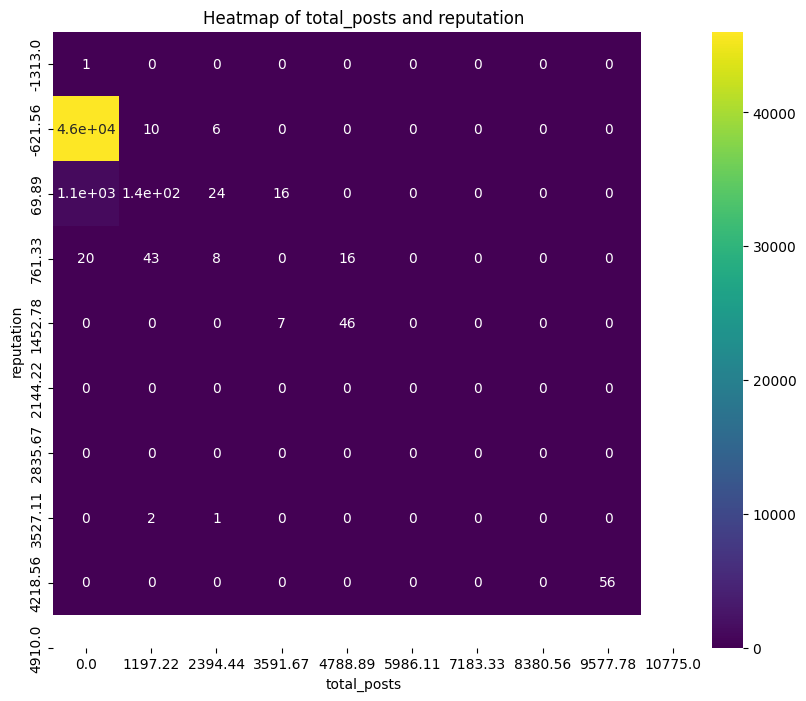

In [229]:
x_bins = np.linspace(df['total_posts'].min(), df['total_posts'].max(), 10)
y_bins = np.linspace(df['reputation'].min(), df['reputation'].max(), 10)
heatmap, xedges, yedges = np.histogram2d(df['total_posts'], df['reputation'], bins=(x_bins, y_bins))
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap.T, xticklabels=np.round(xedges, 2), yticklabels=np.round(yedges, 2), cmap='viridis', cbar=True, annot=True)
plt.xlabel('total_posts')
plt.ylabel('reputation')
plt.title('Heatmap of total_posts and reputation');

In [230]:
df['total_posts'].value_counts()

total_posts
0.0      10005
1.0       8645
2.0       4928
3.0       3270
4.0       2359
         ...  
357.0        1
896.0        1
264.0        1
371.0        1
398.0        1
Name: count, Length: 687, dtype: int64

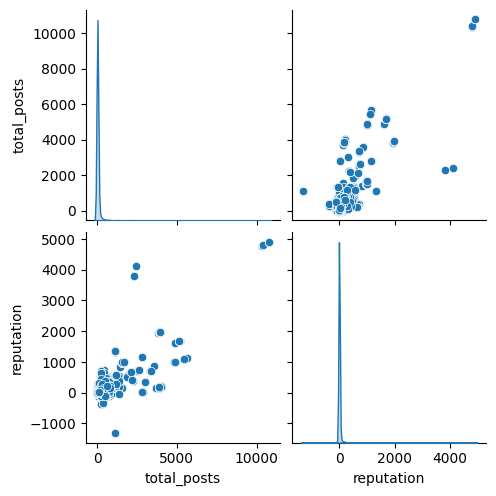

In [231]:
sns.pairplot(df[['total_posts', 'reputation']], diag_kind='kde');

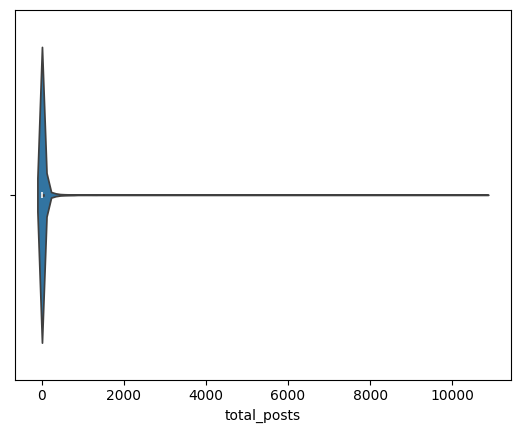

In [232]:
sns.violinplot(x='total_posts', data=df);

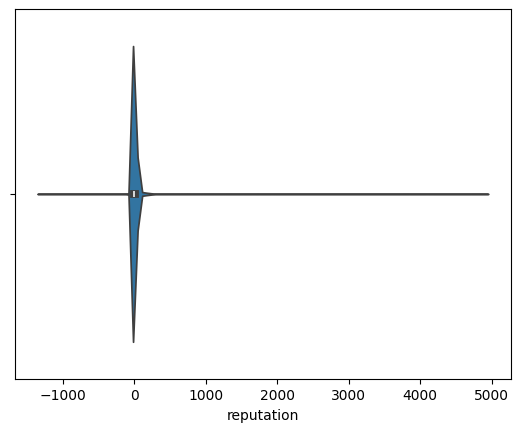

In [233]:
sns.violinplot(x='reputation', data=df);

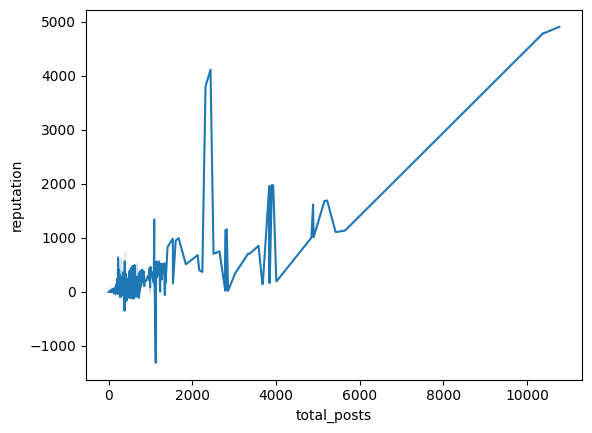

In [234]:
sns.lineplot(x='total_posts', y='reputation', data=df);

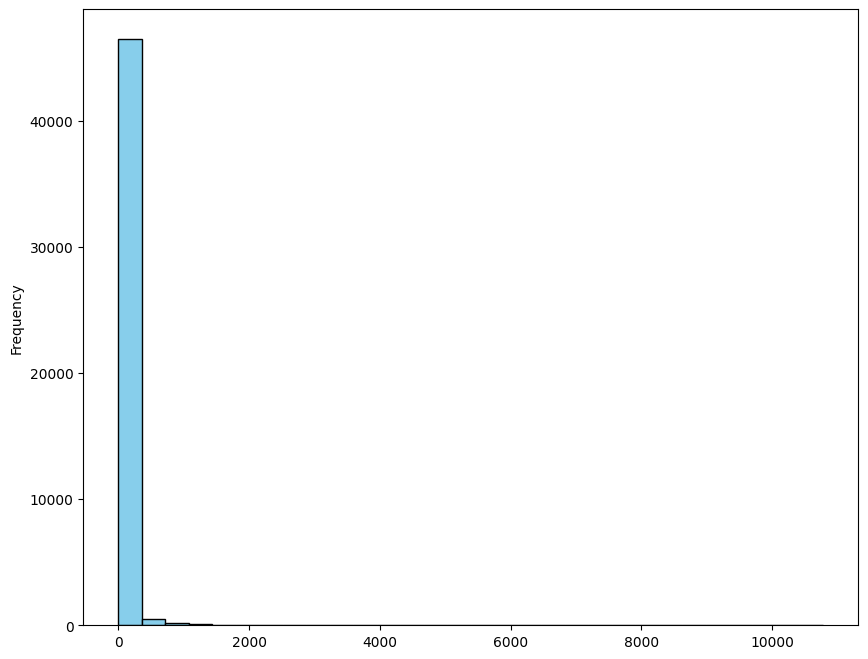

In [235]:
df['total_posts'].plot(kind='hist', bins=30, figsize=(10, 8), color='skyblue', edgecolor='black');

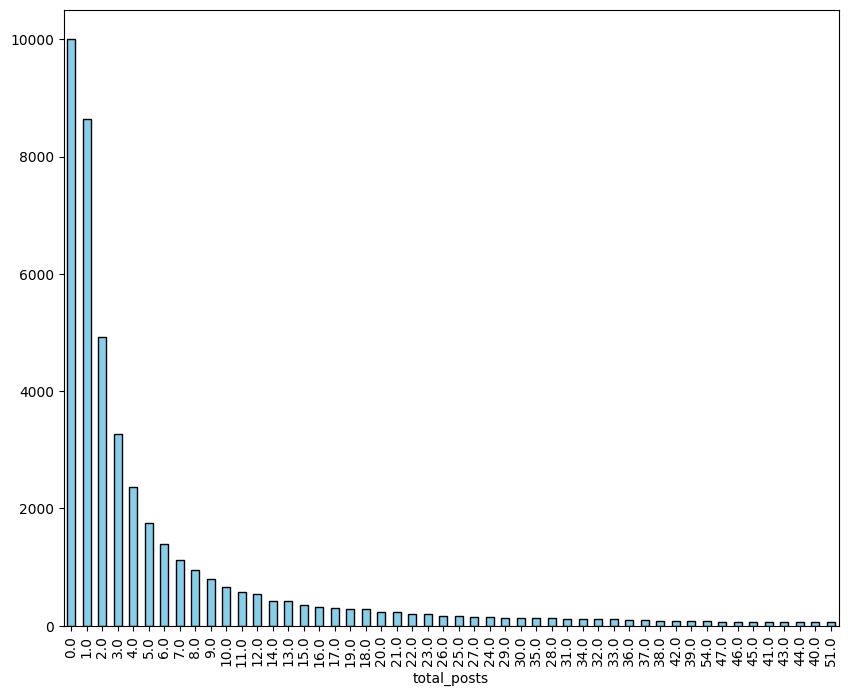

In [236]:
df['total_posts'].value_counts().head(50).plot(kind='bar', figsize=(10, 8), color='skyblue', edgecolor='black');

In [237]:
ppu.standardize(df, 'total_posts')

,id,username,registration_date,total_posts,reputation
0,19215,Ghost-,2019-03-09 00:00:00,-0.118077,0.0
1,30723,trentcarson,2018-07-01 00:00:00,-0.115832,1.0
2,27796,svtlhana,2018-12-26 00:00:00,-0.106854,0.0
3,23894,GingerPotato1,1900-01-01 00:00:00,-0.120321,0.0
4,30717,Skierrant,2018-08-17 00:00:00,-0.118077,0.0
...,...,...,...,...,...
52401,39477,DCUK,2018-07-24 00:00:00,0.090659,32.0
52402,39478,ukgreendoctor,2019-09-01 00:00:00,-0.111343,1.0
52403,39479,shreateh,2019-07-31 00:00:00,-0.088899,-1.0
52404,39480,daone,2019-07-19 00:00:00,-0.035031,6.0


In [238]:
df['reputation'].value_counts()

reputation
 0.0      25887
 1.0       5184
 2.0       2602
-1.0       1902
 3.0       1467
          ...  
 294.0        1
-66.0         1
 147.0        1
 852.0        1
-110.0        1
Name: count, Length: 496, dtype: int64

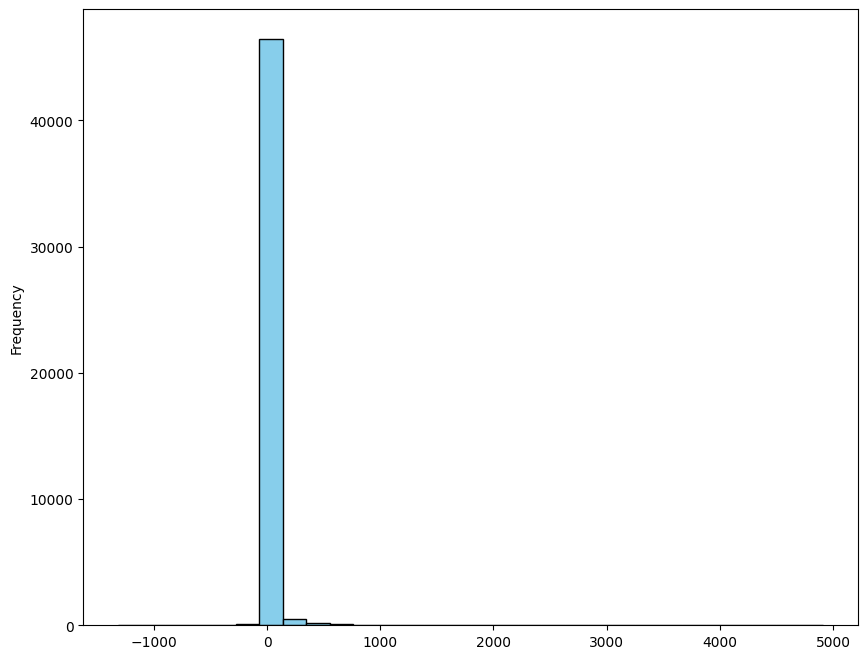

In [239]:
df['reputation'].plot(kind='hist', bins=30, figsize=(10, 8), color='skyblue', edgecolor='black');

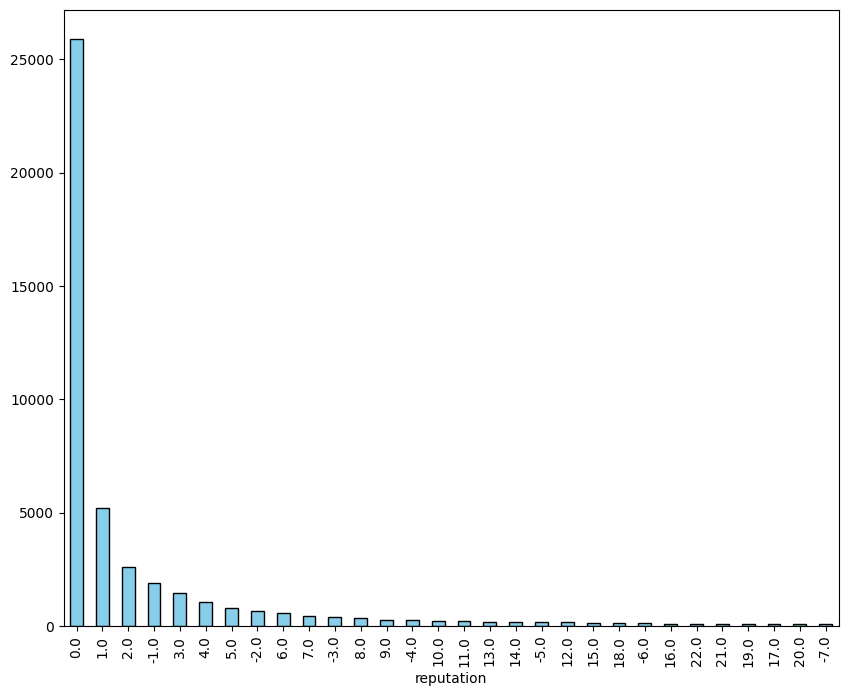

In [240]:
df['reputation'].value_counts().head(30).plot(kind='bar', figsize=(10, 8), color='skyblue', edgecolor='black');

In [241]:
ppu.standardize(df, 'reputation')

,id,username,registration_date,total_posts,reputation
0,19215,Ghost-,2019-03-09 00:00:00,-0.118077,-0.093372
1,30723,trentcarson,2018-07-01 00:00:00,-0.115832,-0.088129
2,27796,svtlhana,2018-12-26 00:00:00,-0.106854,-0.093372
3,23894,GingerPotato1,1900-01-01 00:00:00,-0.120321,-0.093372
4,30717,Skierrant,2018-08-17 00:00:00,-0.118077,-0.093372
...,...,...,...,...,...
52401,39477,DCUK,2018-07-24 00:00:00,0.090659,0.074388
52402,39478,ukgreendoctor,2019-09-01 00:00:00,-0.111343,-0.088129
52403,39479,shreateh,2019-07-31 00:00:00,-0.088899,-0.098614
52404,39480,daone,2019-07-19 00:00:00,-0.035031,-0.061917


In [242]:
df.to_csv(f"{PATH}FeatureEngineeringData/Members/members_reputation_totalpost.csv", index=False)

## Registration Date Analysis

In [243]:
df.head()

,id,username,registration_date,total_posts,reputation
0,19215,Ghost-,2019-03-09 00:00:00,-0.118077,-0.093372
1,30723,trentcarson,2018-07-01 00:00:00,-0.115832,-0.088129
2,27796,svtlhana,2018-12-26 00:00:00,-0.106854,-0.093372
3,23894,GingerPotato1,1900-01-01 00:00:00,-0.120321,-0.093372
4,30717,Skierrant,2018-08-17 00:00:00,-0.118077,-0.093372


In [244]:
ppu.convert_date(df, 'registration_date')

,id,username,registration_date,total_posts,reputation
0,19215,Ghost-,2019-03-09,-0.118077,-0.093372
1,30723,trentcarson,2018-07-01,-0.115832,-0.088129
2,27796,svtlhana,2018-12-26,-0.106854,-0.093372
3,23894,GingerPotato1,1900-01-01,-0.120321,-0.093372
4,30717,Skierrant,2018-08-17,-0.118077,-0.093372
...,...,...,...,...,...
52401,39477,DCUK,2018-07-24,0.090659,0.074388
52402,39478,ukgreendoctor,2019-09-01,-0.111343,-0.088129
52403,39479,shreateh,2019-07-31,-0.088899,-0.098614
52404,39480,daone,2019-07-19,-0.035031,-0.061917


In [245]:
df[df['registration_date'] != '1900-01-01']

,id,username,registration_date,total_posts,reputation
0,19215,Ghost-,2019-03-09,-0.118077,-0.093372
1,30723,trentcarson,2018-07-01,-0.115832,-0.088129
2,27796,svtlhana,2018-12-26,-0.106854,-0.093372
4,30717,Skierrant,2018-08-17,-0.118077,-0.093372
5,19211,vonderpropane,2019-01-02,-0.082165,-0.098614
...,...,...,...,...,...
52401,39477,DCUK,2018-07-24,0.090659,0.074388
52402,39478,ukgreendoctor,2019-09-01,-0.111343,-0.088129
52403,39479,shreateh,2019-07-31,-0.088899,-0.098614
52404,39480,daone,2019-07-19,-0.035031,-0.061917


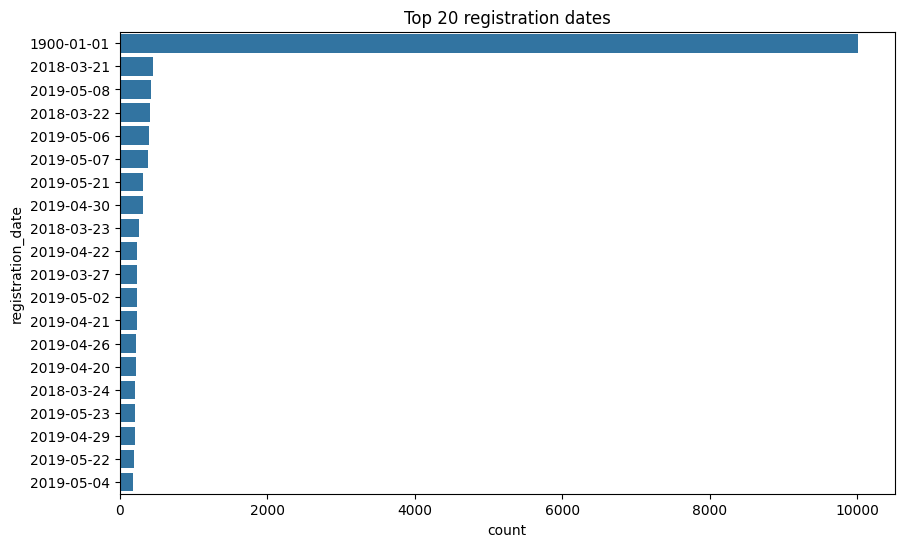

In [246]:
plt.figure(figsize=(10, 6))
sns.barplot(df['registration_date'].value_counts().head(20), orient='h')
plt.title('Top 20 registration dates');

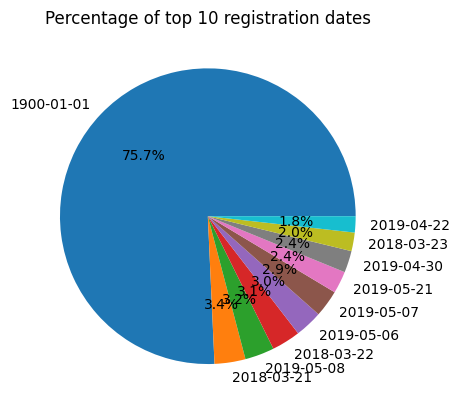

In [247]:
plt.pie(df['registration_date'].value_counts().head(10), labels=df['registration_date'].value_counts().head(10).index, autopct='%1.1f%%')
plt.title('Percentage of top 10 registration dates');

In [248]:
ppu.extract_date_features(df, 'registration_date')

,id,username,registration_date,total_posts,reputation,registration_date_year,registration_date_month,registration_date_day,registration_date_dayofweek,registration_date_is_weekend
0,19215,Ghost-,2019-03-09,-0.118077,-0.093372,2019,3,9,5,1
1,30723,trentcarson,2018-07-01,-0.115832,-0.088129,2018,7,1,6,1
2,27796,svtlhana,2018-12-26,-0.106854,-0.093372,2018,12,26,2,0
3,23894,GingerPotato1,1900-01-01,-0.120321,-0.093372,1900,1,1,0,0
4,30717,Skierrant,2018-08-17,-0.118077,-0.093372,2018,8,17,4,0
...,...,...,...,...,...,...,...,...,...,...
52401,39477,DCUK,2018-07-24,0.090659,0.074388,2018,7,24,1,0
52402,39478,ukgreendoctor,2019-09-01,-0.111343,-0.088129,2019,9,1,6,1
52403,39479,shreateh,2019-07-31,-0.088899,-0.098614,2019,7,31,2,0
52404,39480,daone,2019-07-19,-0.035031,-0.061917,2019,7,19,4,0


In [249]:
df2 = df[df['registration_date_year'] != '1900']
df2

,id,username,registration_date,total_posts,reputation,registration_date_year,registration_date_month,registration_date_day,registration_date_dayofweek,registration_date_is_weekend
0,19215,Ghost-,2019-03-09,-0.118077,-0.093372,2019,3,9,5,1
1,30723,trentcarson,2018-07-01,-0.115832,-0.088129,2018,7,1,6,1
2,27796,svtlhana,2018-12-26,-0.106854,-0.093372,2018,12,26,2,0
4,30717,Skierrant,2018-08-17,-0.118077,-0.093372,2018,8,17,4,0
5,19211,vonderpropane,2019-01-02,-0.082165,-0.098614,2019,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...
52401,39477,DCUK,2018-07-24,0.090659,0.074388,2018,7,24,1,0
52402,39478,ukgreendoctor,2019-09-01,-0.111343,-0.088129,2019,9,1,6,1
52403,39479,shreateh,2019-07-31,-0.088899,-0.098614,2019,7,31,2,0
52404,39480,daone,2019-07-19,-0.035031,-0.061917,2019,7,19,4,0


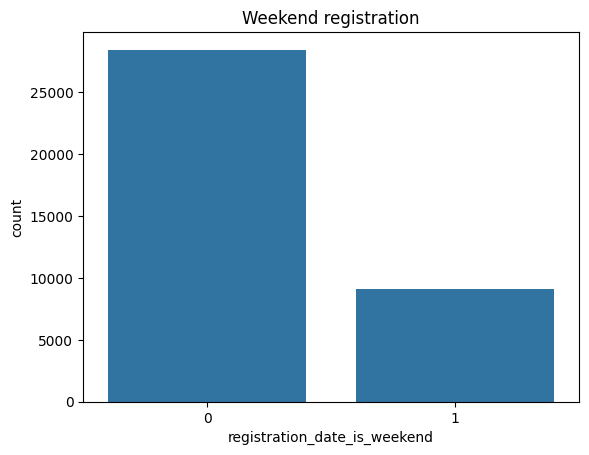

In [250]:
sns.barplot(df2['registration_date_is_weekend'].value_counts())
plt.title('Weekend registration');

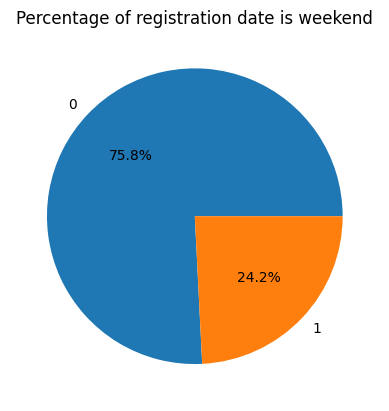

In [251]:
plt.pie(df2['registration_date_is_weekend'].value_counts(), labels=df2['registration_date_is_weekend'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage of registration date is weekend');

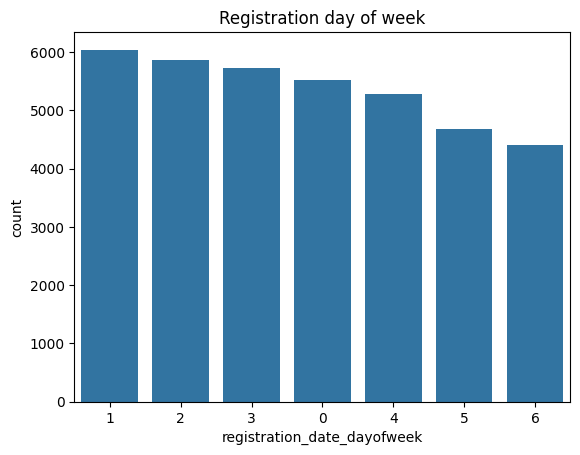

In [252]:
sns.barplot(df2['registration_date_dayofweek'].value_counts())
plt.title('Registration day of week');

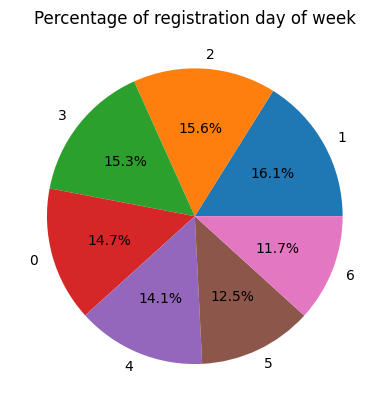

In [253]:
plt.pie(df2['registration_date_dayofweek'].value_counts(), labels=df2['registration_date_dayofweek'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage of registration day of week');

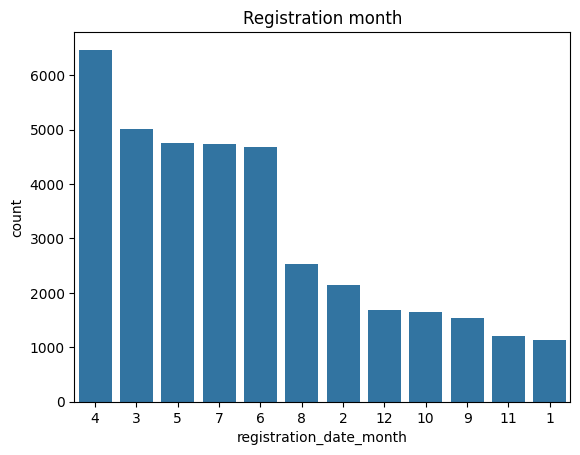

In [254]:
sns.barplot(df2['registration_date_month'].value_counts())
plt.title('Registration month');

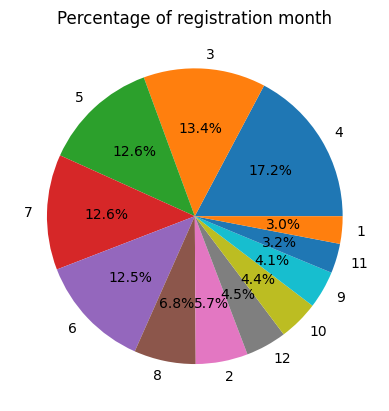

In [255]:
plt.pie(df2['registration_date_month'].value_counts(), labels=df2['registration_date_month'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage of registration month');

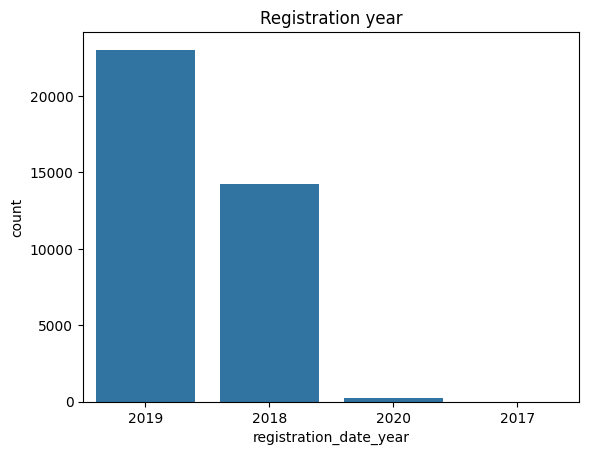

In [256]:
sns.barplot(df2['registration_date_year'].value_counts())
plt.title('Registration year');

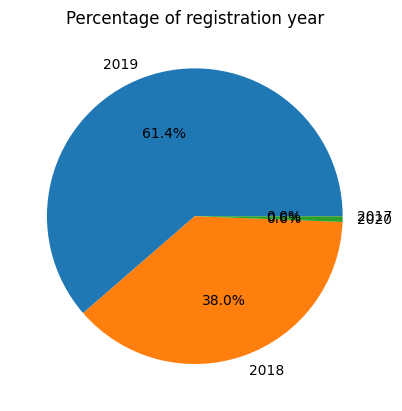

In [257]:
plt.pie(df2['registration_date_year'].value_counts(), labels=df2['registration_date_year'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage of registration year');

In [258]:
df.head()

,id,username,registration_date,total_posts,reputation,registration_date_year,registration_date_month,registration_date_day,registration_date_dayofweek,registration_date_is_weekend
0,19215,Ghost-,2019-03-09,-0.118077,-0.093372,2019,3,9,5,1
1,30723,trentcarson,2018-07-01,-0.115832,-0.088129,2018,7,1,6,1
2,27796,svtlhana,2018-12-26,-0.106854,-0.093372,2018,12,26,2,0
3,23894,GingerPotato1,1900-01-01,-0.120321,-0.093372,1900,1,1,0,0
4,30717,Skierrant,2018-08-17,-0.118077,-0.093372,2018,8,17,4,0


In [259]:
df = ppu.get_dummies(df, 'registration_date_month')
df

,id,username,registration_date,total_posts,reputation,registration_date_year,registration_date_day,registration_date_dayofweek,registration_date_is_weekend,registration_date_month_1,...,registration_date_month_11,registration_date_month_12,registration_date_month_2,registration_date_month_3,registration_date_month_4,registration_date_month_5,registration_date_month_6,registration_date_month_7,registration_date_month_8,registration_date_month_9
0,19215,Ghost-,2019-03-09,-0.118077,-0.093372,2019,9,5,1,False,...,False,False,False,True,False,False,False,False,False,False
1,30723,trentcarson,2018-07-01,-0.115832,-0.088129,2018,1,6,1,False,...,False,False,False,False,False,False,False,True,False,False
2,27796,svtlhana,2018-12-26,-0.106854,-0.093372,2018,26,2,0,False,...,False,True,False,False,False,False,False,False,False,False
3,23894,GingerPotato1,1900-01-01,-0.120321,-0.093372,1900,1,0,0,True,...,False,False,False,False,False,False,False,False,False,False
4,30717,Skierrant,2018-08-17,-0.118077,-0.093372,2018,17,4,0,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52401,39477,DCUK,2018-07-24,0.090659,0.074388,2018,24,1,0,False,...,False,False,False,False,False,False,False,True,False,False
52402,39478,ukgreendoctor,2019-09-01,-0.111343,-0.088129,2019,1,6,1,False,...,False,False,False,False,False,False,False,False,False,True
52403,39479,shreateh,2019-07-31,-0.088899,-0.098614,2019,31,2,0,False,...,False,False,False,False,False,False,False,True,False,False
52404,39480,daone,2019-07-19,-0.035031,-0.061917,2019,19,4,0,False,...,False,False,False,False,False,False,False,True,False,False


In [260]:
df = ppu.get_dummies(df, 'registration_date_dayofweek')
df

,id,username,registration_date,total_posts,reputation,registration_date_year,registration_date_day,registration_date_is_weekend,registration_date_month_1,registration_date_month_10,...,registration_date_month_7,registration_date_month_8,registration_date_month_9,registration_date_dayofweek_0,registration_date_dayofweek_1,registration_date_dayofweek_2,registration_date_dayofweek_3,registration_date_dayofweek_4,registration_date_dayofweek_5,registration_date_dayofweek_6
0,19215,Ghost-,2019-03-09,-0.118077,-0.093372,2019,9,1,False,False,...,False,False,False,False,False,False,False,False,True,False
1,30723,trentcarson,2018-07-01,-0.115832,-0.088129,2018,1,1,False,False,...,True,False,False,False,False,False,False,False,False,True
2,27796,svtlhana,2018-12-26,-0.106854,-0.093372,2018,26,0,False,False,...,False,False,False,False,False,True,False,False,False,False
3,23894,GingerPotato1,1900-01-01,-0.120321,-0.093372,1900,1,0,True,False,...,False,False,False,True,False,False,False,False,False,False
4,30717,Skierrant,2018-08-17,-0.118077,-0.093372,2018,17,0,False,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52401,39477,DCUK,2018-07-24,0.090659,0.074388,2018,24,0,False,False,...,True,False,False,False,True,False,False,False,False,False
52402,39478,ukgreendoctor,2019-09-01,-0.111343,-0.088129,2019,1,1,False,False,...,False,False,True,False,False,False,False,False,False,True
52403,39479,shreateh,2019-07-31,-0.088899,-0.098614,2019,31,0,False,False,...,True,False,False,False,False,True,False,False,False,False
52404,39480,daone,2019-07-19,-0.035031,-0.061917,2019,19,0,False,False,...,True,False,False,False,False,False,False,True,False,False


In [261]:
df = ppu.get_dummies(df, 'registration_date_year')
df

,id,username,registration_date,total_posts,reputation,registration_date_day,registration_date_is_weekend,registration_date_month_1,registration_date_month_10,registration_date_month_11,...,registration_date_dayofweek_2,registration_date_dayofweek_3,registration_date_dayofweek_4,registration_date_dayofweek_5,registration_date_dayofweek_6,registration_date_year_1900,registration_date_year_2017,registration_date_year_2018,registration_date_year_2019,registration_date_year_2020
0,19215,Ghost-,2019-03-09,-0.118077,-0.093372,9,1,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,30723,trentcarson,2018-07-01,-0.115832,-0.088129,1,1,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,27796,svtlhana,2018-12-26,-0.106854,-0.093372,26,0,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,23894,GingerPotato1,1900-01-01,-0.120321,-0.093372,1,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,30717,Skierrant,2018-08-17,-0.118077,-0.093372,17,0,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52401,39477,DCUK,2018-07-24,0.090659,0.074388,24,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
52402,39478,ukgreendoctor,2019-09-01,-0.111343,-0.088129,1,1,False,False,False,...,False,False,False,False,True,False,False,False,True,False
52403,39479,shreateh,2019-07-31,-0.088899,-0.098614,31,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
52404,39480,daone,2019-07-19,-0.035031,-0.061917,19,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [262]:
df.drop(columns=['registration_date', 'registration_date_day'], inplace=True)

In [263]:
df.head()

,id,username,total_posts,reputation,registration_date_is_weekend,registration_date_month_1,registration_date_month_10,registration_date_month_11,registration_date_month_12,registration_date_month_2,...,registration_date_dayofweek_2,registration_date_dayofweek_3,registration_date_dayofweek_4,registration_date_dayofweek_5,registration_date_dayofweek_6,registration_date_year_1900,registration_date_year_2017,registration_date_year_2018,registration_date_year_2019,registration_date_year_2020
0,19215,Ghost-,-0.118077,-0.093372,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,30723,trentcarson,-0.115832,-0.088129,1,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,27796,svtlhana,-0.106854,-0.093372,0,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
3,23894,GingerPotato1,-0.120321,-0.093372,0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,30717,Skierrant,-0.118077,-0.093372,0,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [264]:
df.to_csv(f"{PATH}FeatureEngineeringData/Members/members_reputation_totalpost_registration_date.csv", index=False)